# PyVWF: Running multiple scenarios and plotting

This notebook exists for research purposes to easily run and compare all the various variations of this model:
- How spatial (no. of clusters) and temporal (from yearly to monthly) 

This code can take a long time to run as training needs to occur dependent on number of clusters.

In [2]:
import vwf.vwf as model

In [1]:
# DOWNLOAD ERA5 DATA
import cdsapi

for year in ["2015","2016","2017","2018"]:
    dataset = "reanalysis-era5-single-levels"
    request = {
        "product_type": ["reanalysis"],
        "variable": [
            "10m_u_component_of_wind",
            "10m_v_component_of_wind",
        ],
        "year": [year],
        "month": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12"
        ],
        "day": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12",
            "13", "14", "15",
            "16", "17", "18",
            "19", "20", "21",
            "22", "23", "24",
            "25", "26", "27",
            "28", "29", "30",
            "31"
        ],
        "time": [
            "00:00", "01:00", "02:00",
            "03:00", "04:00", "05:00",
            "06:00", "07:00", "08:00",
            "09:00", "10:00", "11:00",
            "12:00", "13:00", "14:00",
            "15:00", "16:00", "17:00",
            "18:00", "19:00", "20:00",
            "21:00", "22:00", "23:00"
        ],
        "data_format": "netcdf",
    #   "download_format": "zip",
        "area": [54.0, 2.0, 50.0, 8.0],  # North, West, South, East
    }

    client = cdsapi.Client()
    client.retrieve(dataset, request).download()

2025-12-22 12:23:29,877 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-22 12:23:30,331 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2025-12-22 12:23:30,333 INFO Request ID is c508e02f-2a7b-4699-9218-582168ac02c3
2025-12-22 12:23:30,697 INFO status has been updated to accepted
2025-12-22 12:23:39,282 INFO status has been updated to running
2025-12-22 12:23:44,537 INFO status has been updated to successful
2025-12-22 12:23:54,964 INFO [2

In [2]:
for year in ["2015","2016","2017","2018"]:
    dataset = "reanalysis-era5-single-levels"
    request = {
        "product_type": ["reanalysis"],
        "variable": [
            "100m_u_component_of_wind",
            "100m_v_component_of_wind",
        ],
        "year": [year],
        "month": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12"
        ],
        "day": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12",
            "13", "14", "15",
            "16", "17", "18",
            "19", "20", "21",
            "22", "23", "24",
            "25", "26", "27",
            "28", "29", "30",
            "31"
        ],
        "time": [
            "00:00", "01:00", "02:00",
            "03:00", "04:00", "05:00",
            "06:00", "07:00", "08:00",
            "09:00", "10:00", "11:00",
            "12:00", "13:00", "14:00",
            "15:00", "16:00", "17:00",
            "18:00", "19:00", "20:00",
            "21:00", "22:00", "23:00"
        ],
        "data_format": "netcdf",
    #   "download_format": "zip",
        "area": [54.0, 2.0, 50.0, 8.0],  # North, West, South, East
    }

    client = cdsapi.Client()
    client.retrieve(dataset, request).download()

2025-12-22 14:23:56,639 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-22 14:23:57,074 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2025-12-22 14:23:57,075 INFO Request ID is 79ff1414-396b-4b48-a893-16462e1acaba
2025-12-22 14:23:57,201 INFO status has been updated to accepted
2025-12-22 14:24:11,268 INFO status has been updated to running
2025-12-22 14:42:27,840 INFO status has been updated to successful
2025-12-22 14:42:39,195 INFO [2

### Denmark Variables

In [ ]:
country = "DK" # "DE"
year_test = 2020 # year you wish to receive a time series for | # 2019 for DE # 2020 for DK

cluster_list = [1,2,5,7,10,20,50,70,100,200,500,700,800,900,1000,2000,3000,3300]
time_res_list = ['fixed', 'season', 'bimonth', 'month']

calc_z0 = True
cluster_mode = 'onshore' # 'all', 'onshore', 'offshore'
add_nan = None # % to remove from data
interp_nan = None # monthly limit to interpretating NaN
fix_turb = None # turbine to fix to #'GE.1.5se' # 'Vestas.V66.2000'

vwf_model = model.PyVWF(
    "", 
    country,
    True,
    calc_z0=calc_z0,
    cluster_mode=cluster_mode, 
    cluster_list=cluster_list, 
    time_res_list=time_res_list, 
    add_nan=add_nan, 
    interp_nan=interp_nan, 
    fix_turb=fix_turb
)

Creating new directories in 'run/DK-onshore-corrected-calc_z0':
PyVWF is already trained for the following clusters--time-res:
['1-fixed', '1-season', '1-bimonth', '1-month']

PyVWF will be trained for:
['10-fixed', '10-season', '10-bimonth', '10-month', '20-fixed', '20-season', '20-bimonth', '20-month']


### Germany Variables

In [3]:
country = "DE"
year_test = 2019 # year you wish to receive a time series for | # 2019 for DE

time_res_list = ['fixed']
cluster_list = [1,2,5,7,10,20,50,70,100,200,500,579]

calc_z0 = True
cluster_mode = 'all' # 'all', 'onshore', 'offshore'
add_nan = None # % to remove from data
interp_nan = None # monthly limit to interpretating NaN
fix_turb = None # turbine to fix to #'GE.1.5se' # 'Vestas.V66.2000'

vwf_model = model.PyVWF(
    "", 
    country,
    True,
    calc_z0=calc_z0,
    cluster_mode=cluster_mode, 
    cluster_list=cluster_list, 
    time_res_list=time_res_list, 
    add_nan=add_nan, 
    interp_nan=interp_nan, 
    fix_turb=fix_turb
)

Creating new directories in 'run/DE-all-corrected-calc_z0':
PyVWF is already trained for the following [Clusters-Temporal Resolution]:
['1-fixed', '2-fixed', '5-fixed', '7-fixed', '10-fixed', '20-fixed', '50-fixed', '70-fixed', '100-fixed', '200-fixed', '500-fixed']

PyVWF will be trained for:
['579-fixed']
--------------------------------


### UK Variables

In [ ]:
country = "UK"
year_test = 2019

time_res_list = ['fixed', 'season', 'bimonth', 'month']
cluster_list = [1,2,5,10,15,20,50,80,100,120,150,180,200,250,300,327]

calc_z0 = True
cluster_mode = 'all' # 'all', 'onshore', 'offshore'
add_nan = None # % to remove from data
interp_nan = None # monthly limit to interpretating NaN
fix_turb = None # turbine to fix to #'GE.1.5se' # 'Vestas.V66.2000'

vwf_model = model.PyVWF(
    "", 
    country,
    True,
    calc_z0=calc_z0,
    cluster_mode=cluster_mode, 
    cluster_list=cluster_list, 
    time_res_list=time_res_list, 
    add_nan=add_nan, 
    interp_nan=interp_nan, 
    fix_turb=fix_turb
)

Creating new directories in 'run/DE-onshore-corrected-calc_z0':
PyVWF is already trained for the following clusters--time-res:
['700-fixed']

PyVWF will be trained for:
['1-fixed', '1-season', '1-bimonth', '1-month', '2-fixed', '2-season', '2-bimonth', '2-month', '5-fixed', '5-season', '5-bimonth', '5-month', '7-fixed', '7-season', '7-bimonth', '7-month', '10-fixed', '10-season', '10-bimonth', '10-month', '20-fixed', '20-season', '20-bimonth', '20-month', '50-fixed', '50-season', '50-bimonth', '50-month', '70-fixed', '70-season', '70-bimonth', '70-month', '100-fixed', '100-season', '100-bimonth', '100-month', '200-fixed', '200-season', '200-bimonth', '200-month', '500-fixed', '500-season', '500-bimonth', '500-month', '700-season', '700-bimonth', '700-month', '800-fixed', '800-season', '800-bimonth', '800-month']


### FR Variables

In [ ]:
country = "FR"
year_test = 2019

time_res_list = ['fixed']
cluster_list = [1]

calc_z0 = True
cluster_mode = 'all' # 'all', 'onshore', 'offshore'
add_nan = None # % to remove from data
interp_nan = None # monthly limit to interpretating NaN
fix_turb = None # turbine to fix to #'GE.1.5se' # 'Vestas.V66.2000'

vwf_model = model.PyVWF(
    "", 
    country,
    True,
    calc_z0=calc_z0,
    cluster_mode=cluster_mode, 
    cluster_list=cluster_list, 
    time_res_list=time_res_list, 
    add_nan=add_nan, 
    interp_nan=interp_nan, 
    fix_turb=fix_turb
)

Creating new directories in 'run/DE-onshore-corrected-calc_z0':
PyVWF is already trained for the following clusters--time-res:
['700-fixed']

PyVWF will be trained for:
['1-fixed', '1-season', '1-bimonth', '1-month', '2-fixed', '2-season', '2-bimonth', '2-month', '5-fixed', '5-season', '5-bimonth', '5-month', '7-fixed', '7-season', '7-bimonth', '7-month', '10-fixed', '10-season', '10-bimonth', '10-month', '20-fixed', '20-season', '20-bimonth', '20-month', '50-fixed', '50-season', '50-bimonth', '50-month', '70-fixed', '70-season', '70-bimonth', '70-month', '100-fixed', '100-season', '100-bimonth', '100-month', '200-fixed', '200-season', '200-bimonth', '200-month', '500-fixed', '500-season', '500-bimonth', '500-month', '700-season', '700-bimonth', '700-month', '800-fixed', '800-season', '800-bimonth', '800-month']


### Run PyVWF

In [4]:
vwf_model.train(False)

Total observed turbines/farms before conditions:  10931
prepping ERA5 data for DE, train=True, calc_z0=True
Only valid_time exists → renaming to time
Calculated surface roughness length
ERA5 for DE ready
Interpolated wind speeds to turbine locations
Training on  4288  turbines/farms |  4288  onshore |  0  offshore
Deriving correction factors for PyVWF( 579 , fixed ) ...
Completed and saved. Elapsed time: 230.05 seconds

--------------------------------


In [5]:
vwf_model.simulate_cf(year_test)

Total observed turbines/farms before conditions:  10931
prepping ERA5 data for DE, train=False, calc_z0=True
Calculated surface roughness length
ERA5 for DE ready
Simulating  4814  turbines/farms |  4814  onshore |  0  offshore
 
Uncorrected CF was previously simulated.

PyVWF( 1 -- fixed ) was previously simulated.

PyVWF( 2 -- fixed ) was previously simulated.

PyVWF( 5 -- fixed ) was previously simulated.

PyVWF( 7 -- fixed ) was previously simulated.

PyVWF( 10 -- fixed ) was previously simulated.

PyVWF( 20 -- fixed ) was previously simulated.

PyVWF( 50 -- fixed ) was previously simulated.

PyVWF( 70 -- fixed ) was previously simulated.

PyVWF( 100 -- fixed ) was previously simulated.

PyVWF( 200 -- fixed ) was previously simulated.

PyVWF( 500 -- fixed ) was previously simulated.

Simulating CF using PyVWF( 579 ,  fixed ) ...
Interpolated wind speeds to turbine locations
Completed and saved. Elapsed time: 4.63 seconds
 


Saved to run/DE-all-corrected-calc_z0/plots/DE_full_error.png

Saved to run/DE-all-corrected-calc_z0/plots/DE_temporal_focus_error.png

Saved to run/DE-all-corrected-calc_z0/plots/DE_spatial_focus_error.png



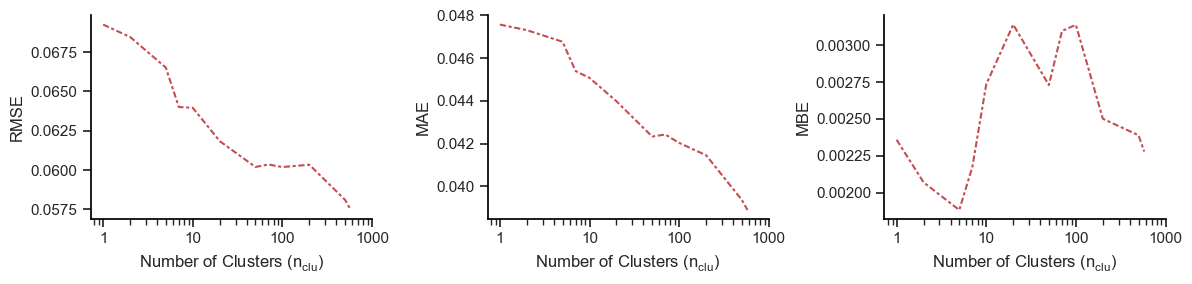

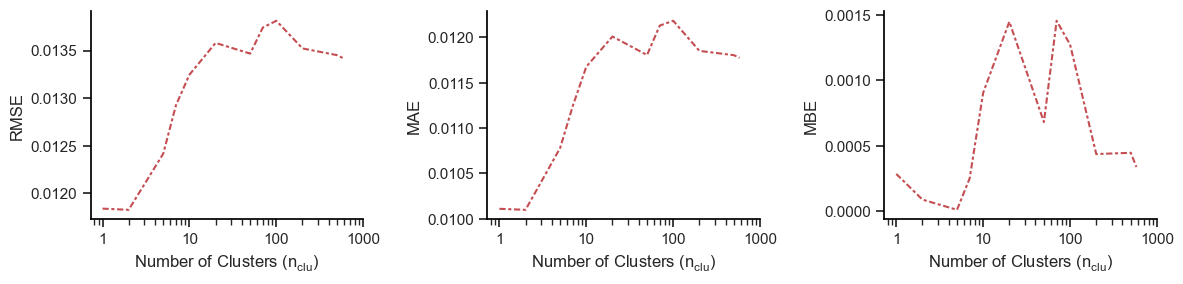

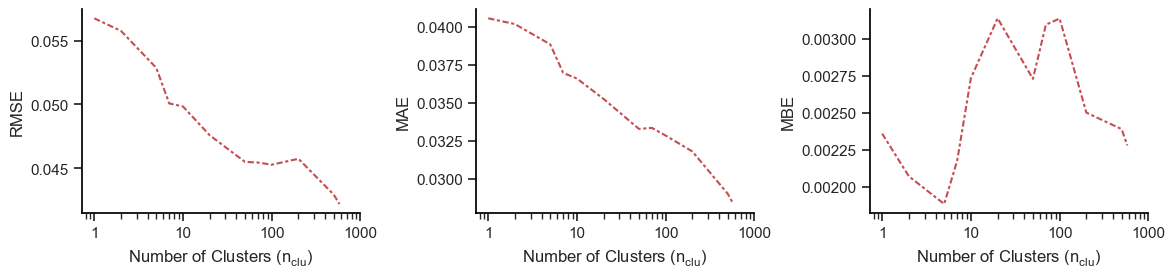

In [6]:
vwf_model.research_error()

In [9]:
vwf_model = model.VWF(country, cluster_list, time_res_list, cluster_mode, add_nan, interp_nan, fix_turb)
# vwf_model.train(True)
# vwf_model.simulate_cf(year_test,'onshore')
# vwf_model.simulate_cf(year_test,'onshore', 'Vestas.V66.2000')
vwf_model.simulate_cf(year_test,'onshore', 'GE.1.5se')

Creating new directories in 'run/DK-onshore-standard-calculate_z0':
Created run/DK-onshore-standard-calculate_z0/results/capacity-factor
Created run/DK-onshore-standard-calculate_z0/results/wind-speed
Total observed turbines/farms before conditions:  5623
Simulating  4834  turbines/farms |  4834  onshore |  0  offshore
Simulating CF using PyVWF( 1 ,  fixed ) ...
Completed and saved. Elapsed time: 2.85 seconds
 
Simulating CF using PyVWF( 1 ,  season ) ...
Completed and saved. Elapsed time: 2.87 seconds
 
Simulating CF using PyVWF( 1 ,  bimonth ) ...
Completed and saved. Elapsed time: 2.88 seconds
 
Simulating CF using PyVWF( 1 ,  month ) ...
Completed and saved. Elapsed time: 2.92 seconds
 
Simulating CF using PyVWF( 10 ,  fixed ) ...
Completed and saved. Elapsed time: 2.94 seconds
 
Simulating CF using PyVWF( 10 ,  season ) ...
Completed and saved. Elapsed time: 2.82 seconds
 
Simulating CF using PyVWF( 10 ,  bimonth ) ...
Completed and saved. Elapsed time: 2.82 seconds
 
Simulating C

In [3]:
vwf_model = model.VWF(country, cluster_list, time_res_list, cluster_mode, 0.5, None, None)
vwf_model.train(False)
vwf_model.simulate_cf(year_test,'onshore')

Creating new directories in 'run/DK-onshore-r0.5-calculate_z0':
Created run/DK-onshore-r0.5-calculate_z0/training/correction-factors
Created run/DK-onshore-r0.5-calculate_z0/training/simulated-turbines
Created run/DK-onshore-r0.5-calculate_z0/results/capacity-factor
Created run/DK-onshore-r0.5-calculate_z0/results/wind-speed
Created run/DK-onshore-r0.5-calculate_z0/plots
Total observed turbines/farms before conditions:  5623
Training on  3389  turbines/farms |  3389  onshore |  0  offshore
Deriving correction factors for PyVWF( 1 , fixed ) ...
Completed and saved. Elapsed time: 29.45 seconds

Deriving correction factors for PyVWF( 1 , season ) ...
Completed and saved. Elapsed time: 17.66 seconds

Deriving correction factors for PyVWF( 1 , bimonth ) ...
Completed and saved. Elapsed time: 17.38 seconds

Deriving correction factors for PyVWF( 1 , month ) ...
Completed and saved. Elapsed time: 29.42 seconds

Deriving correction factors for PyVWF( 10 , fixed ) ...
Completed and saved. Elaps

In [4]:
vwf_model = model.VWF(country, cluster_list, time_res_list, cluster_mode, None, None, 'GE.1.5se')
vwf_model.train(False)
vwf_model.simulate_cf(year_test,'onshore')

Creating new directories in 'run/DK-onshore-GE.1.5se-calculate_z0':
Created run/DK-onshore-GE.1.5se-calculate_z0/training/correction-factors
Created run/DK-onshore-GE.1.5se-calculate_z0/training/simulated-turbines
Created run/DK-onshore-GE.1.5se-calculate_z0/results/capacity-factor
Created run/DK-onshore-GE.1.5se-calculate_z0/results/wind-speed
Created run/DK-onshore-GE.1.5se-calculate_z0/plots
Total observed turbines/farms before conditions:  5623
Training on  3389  turbines/farms |  3389  onshore |  0  offshore
Deriving correction factors for PyVWF( 1 , fixed ) ...
Completed and saved. Elapsed time: 26.65 seconds

Deriving correction factors for PyVWF( 1 , season ) ...
Completed and saved. Elapsed time: 11.60 seconds

Deriving correction factors for PyVWF( 1 , bimonth ) ...
Completed and saved. Elapsed time: 11.78 seconds

Deriving correction factors for PyVWF( 1 , month ) ...
Completed and saved. Elapsed time: 11.44 seconds

Deriving correction factors for PyVWF( 10 , fixed ) ...
Co

In [6]:
vwf_model = model.VWF(country, cluster_list, time_res_list, cluster_mode, None, None, 'Vestas.V66.2000')
vwf_model.train(False)
vwf_model.simulate_cf(year_test,'onshore')

Creating new directories in 'run/DK-onshore-Vestas.V66.2000-calculate_z0':
Total observed turbines/farms before conditions:  5623
Training on  3389  turbines/farms |  3389  onshore |  0  offshore
PyVWF( 1 -- fixed ) was previously trained.

PyVWF( 1 -- season ) was previously trained.

PyVWF( 1 -- bimonth ) was previously trained.

PyVWF( 1 -- month ) was previously trained.

PyVWF( 10 -- fixed ) was previously trained.

PyVWF( 10 -- season ) was previously trained.

PyVWF( 10 -- bimonth ) was previously trained.

PyVWF( 10 -- month ) was previously trained.

PyVWF( 100 -- fixed ) was previously trained.

PyVWF( 100 -- season ) was previously trained.

PyVWF( 100 -- bimonth ) was previously trained.

PyVWF( 100 -- month ) was previously trained.

PyVWF( 500 -- fixed ) was previously trained.

PyVWF( 500 -- season ) was previously trained.

PyVWF( 500 -- bimonth ) was previously trained.

PyVWF( 500 -- month ) was previously trained.

PyVWF( 1000 -- fixed ) was previously trained.

PyVW

In [4]:
# vwf_model.simulate_cf(year_test,'onshore', 'Vestas.V66.2000')
# vwf_model.simulate_cf(year_test,'onshore', 'GE.1.5se')
# vwf_model.simulate_cf(year_test,'onshore')

Total observed turbines/farms before conditions:  5623
Simulating  4834  turbines/farms |  4834  onshore |  0  offshore
Simulating CF using PyVWF( 1 ,  fixed ) ...
Completed and saved. Elapsed time: 2.66 seconds
 
Simulating CF using PyVWF( 1 ,  season ) ...
Completed and saved. Elapsed time: 2.72 seconds
 
Simulating CF using PyVWF( 1 ,  bimonth ) ...
Completed and saved. Elapsed time: 2.72 seconds
 
Simulating CF using PyVWF( 1 ,  month ) ...
Completed and saved. Elapsed time: 2.68 seconds
 
Simulating CF using PyVWF( 10 ,  fixed ) ...
Completed and saved. Elapsed time: 2.75 seconds
 
Simulating CF using PyVWF( 10 ,  season ) ...
Completed and saved. Elapsed time: 2.75 seconds
 
Simulating CF using PyVWF( 10 ,  bimonth ) ...
Completed and saved. Elapsed time: 2.70 seconds
 
Simulating CF using PyVWF( 10 ,  month ) ...
Completed and saved. Elapsed time: 2.70 seconds
 
Simulating CF using PyVWF( 100 ,  fixed ) ...
Completed and saved. Elapsed time: 2.77 seconds
 
Simulating CF using Py